In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import csv
from collections import Counter
import statsmodels.api as sm 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Summary

The main question this notebook tries to answer is this: <br>
<b>Why does a donor only donates once in his donor lifetime cycle to Leuven Univeristy Fund (LUF)? Are there similarities in this type of donations (e.g. is the gift linked to a specific event)? </b> <br>

Note that there are 3 types of credits that can be donated by donors to the Leuven Univerity Fund (LUF), namely <b>Funds</b>, <b>Chairs</b>, & <b>Other Credits</b>. <br>

In order to answer this question, we try try to analyse the number of donations LUF received over time. <br>
Here, we plot line graphs containing two lines: One representing donors who have only donated once <b>(Uni-donors)</b> and the other one represents the <i><b>firs</b>t</i> donation of donors who went on to donate again to the LUF <b>(Multi-donors)</b>. <br>

From the line graphs, we should be able to get some interesting ideas about why some donors only donate once to the LUF.

In [3]:
main_data = pd.read_csv('sqldata/question2.csv',dtype = str)
#Normalize the sum: If two person payed 1000 Euro, then each person's normalized sum is 500 Euro
df = pd.DataFrame.from_dict(Counter((main_data['ORDER_GUID'])), orient='index').reset_index()
df = df.rename(columns={'index':'ORDER_GUID', 0:'ORDER_GUID_COUNT'})
main_data = pd.merge(main_data,df,on='ORDER_GUID',how='inner')
main_data['ZZAMNT_PAYED'] = main_data['ZZAMNT_PAYED'].astype('float64')
main_data['ORDER_GUID_COUNT'] = main_data['ORDER_GUID_COUNT'].astype('int32')
print(main_data['ZZAMNT_PAYED'].sum())
main_data['ZZAMNT_PAYED_NORM'] = main_data['ZZAMNT_PAYED']/main_data['ORDER_GUID_COUNT']
print(main_data['ZZAMNT_PAYED_NORM'].sum().round(2))
print(main_data.shape)
main_data.head()

138438337.52
130563906.13
(130934, 34)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00


In [4]:
#Check for inconsistency among the data. One inconsistency could be if the donation sum is less than 0
main_data['ZZAMNT_PAYED'] = main_data['ZZAMNT_PAYED'].astype('float64')
main_data[main_data['ZZAMNT_PAYED'] < 0]

,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
126029,0201222693,1,0,NaN,N,BE,NaN,X,NaN,X,...,400001501822,00001,Fonds Digestieve Oncologie,02,01,2017,2017,KLINISCHE DIGESTIEVE ONCOLOGIE,2,-337.5
126030,0201222694,1,0,NaN,NaN,NaN,NaN,X,X,NaN,...,400001501822,00001,Fonds Digestieve Oncologie,02,01,2017,2017,KLINISCHE DIGESTIEVE ONCOLOGIE,2,-337.5


As you can see there are two entries where donation amount is -675 Euro. This is also a joint donation. This data needs to be removed.

In [5]:
main_data = main_data[main_data['ZZAMNT_PAYED'] >= 0]
main_data.reset_index(drop=True,inplace=True)
print(main_data.shape)
main_data.head()

(130932, 34)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00


In [6]:
#Calculate all the statistics: Actually just the Total Count is needed for this exercise
order_subset = main_data[['PARTNER','ZZAMNT_PAYED_NORM']]
aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in order_subset.groupby('PARTNER'))
aggregate['PARTNER'] = aggregate.index
aggregate = aggregate.reset_index(drop=True)
aggregate = aggregate.rename(columns={'count':'DONATION_COUNT',
                                      'mean':'DONATION_MEAN',
                                      'std':'DONATION_STD',
                                      'min':'DONATION_MIN',
                                      '25%':'DONATION_25',
                                      '50%':'DONATION_50',
                                      '75%':'DONATION_75',
                                      'max':'DONATION_MAX'})
                                      
front = aggregate['PARTNER']
aggregate.drop(labels=['PARTNER'], axis=1,inplace = True)
aggregate.insert(0, 'PARTNER', front)
print(aggregate.shape)
aggregate.head()

(56897, 9)


,PARTNER,DONATION_COUNT,DONATION_MEAN,DONATION_STD,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX
0,0200000002,7.0,2186.277143,735.028946,1000.0,1901.970,2500.0,2500.0,3000.00
1,0200000007,13.0,14058.253077,20169.415559,1250.0,4399.100,5750.0,11500.0,63563.29
2,0200000010,8.0,575.000000,265.921578,100.0,500.000,500.0,725.0,1000.00
3,0200000013,19.0,12567.816842,10158.236431,1000.0,3907.125,9110.0,24317.5,32000.00
4,0200000024,1.0,20000.000000,NaN,20000.0,20000.000,20000.0,20000.0,20000.00


<b>DONATION_COUNT</b> is used to classify between Uni-donors (DONATION_COUNT == 1) and Multi-donors (DONATION_COUNT > 1)

In [7]:
aggregate = aggregate[['PARTNER','DONATION_COUNT']]
main_data = pd.merge(main_data, aggregate, on='PARTNER', how='inner')
print(main_data.shape)
main_data.head()

(130932, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00,7.0
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00,7.0
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94,7.0
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0


In [8]:
#Sort Values according to PARTNER & DOCUMENT DATE. Reset the index
main_data.sort_values(['PARTNER', 'ZLUF_DOCDATE'], ascending=[1,1])
main_data.reset_index(drop=True, inplace=True)
print(main_data.shape)
main_data.head()

(130932, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00,7.0
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00,7.0
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94,7.0
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0


We are only interested in the first donation of Multi-donors for this exercise. That's why we sort the donations for each Multi-donors according to their donation date (ZLUF_DOCDATE).

In [9]:
#Only select the entry with first donation
main_data_for_gift = main_data  #For later to do time series plot for gifts
main_data = main_data.sort_values(['PARTNER', 'ZLUF_DOCDATE'], ascending=[1,1]).groupby('PARTNER').head(1)
main_data.reset_index(drop=True, inplace=True)
print(main_data.shape)
main_data.head()

(56897, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.0,7.0
1,0200000007,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dep. Farmaceutische Wetenschappen,NaN,03,2010,2010,NaN,1,4000.0,13.0
2,0200000010,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00001,Science@Leuven Fund,NaN,03,2009,2009,NaN,1,100.0,8.0
3,0200000013,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Fac. Economie en Bedrijfswetenschappen,NaN,03,2012,2012,NaN,1,5000.0,19.0
4,0200000024,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00001,KU Leuven Erfgoedfonds,01,02,2018,2018,DIENST ALUMNI,1,20000.0,1.0


In [10]:
#TARGET CLASS
main_data['IS_MULTI_DONOR'] = (main_data['DONATION_COUNT'] > 1).astype(int)
print(main_data.shape)
main_data.head()

(56897, 36)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT,IS_MULTI_DONOR
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.0,7.0,1
1,0200000007,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dep. Farmaceutische Wetenschappen,NaN,03,2010,2010,NaN,1,4000.0,13.0,1
2,0200000010,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Science@Leuven Fund,NaN,03,2009,2009,NaN,1,100.0,8.0,1
3,0200000013,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fac. Economie en Bedrijfswetenschappen,NaN,03,2012,2012,NaN,1,5000.0,19.0,1
4,0200000024,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,KU Leuven Erfgoedfonds,01,02,2018,2018,DIENST ALUMNI,1,20000.0,1.0,0


In the below cell, we create additional features such as Year of donation, Month of donation, and normalized Month of donation. <br>
Normalized month (ZLUF_DOCDATE_M_N) of donation means the value is 1 for Jan 2002, 2 for Feb 2002, .. 12 for Dec 2002, 13 for Jan 2003,.. and so on. <br> 
This normalized month can be very helpful when creating time series plot.

In [11]:
time_line_data = main_data[['PARTNER','TYPE','ZLUF_DOCDATE','ZZAMNT_PAYED_NORM','IS_MULTI_DONOR']]
time_line_data['ZLUF_DOCDATE'] = pd.to_datetime(time_line_data['ZLUF_DOCDATE'])
time_line_data['ZLUF_DOCDATE_Y'] = time_line_data['ZLUF_DOCDATE'].dt.year
time_line_data['ZLUF_DOCDATE_M'] = time_line_data['ZLUF_DOCDATE'].dt.month
time_line_data['ZLUF_DOCDATE_M_N'] = (time_line_data['ZLUF_DOCDATE_Y'] - 
                                          time_line_data['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + time_line_data['ZLUF_DOCDATE_M']
print(time_line_data.shape)
time_line_data.head(10) 

(56897, 8)


,PARTNER,TYPE,ZLUF_DOCDATE,ZZAMNT_PAYED_NORM,IS_MULTI_DONOR,ZLUF_DOCDATE_Y,ZLUF_DOCDATE_M,ZLUF_DOCDATE_M_N
0,0200000002,2,2004-07-20,1000.0,1,2004,7,31
1,0200000007,2,2010-11-02,4000.0,1,2010,11,107
2,0200000010,2,2009-12-22,100.0,1,2009,12,96
3,0200000013,2,2012-02-28,5000.0,1,2012,2,122
4,0200000024,2,2018-01-03,20000.0,0,2018,1,193
5,0200000035,2,2007-10-15,15000.0,1,2007,10,70
6,0200000041,2,2018-04-24,200.0,1,2018,4,196
7,0200000054,2,2018-06-08,125.0,0,2018,6,198
8,0200000058,2,2002-07-18,30.0,1,2002,7,7
9,0200000097,1,2014-05-12,40.0,0,2014,5,149


The below cell considers all dates from Jan 2002 till Dec 2018 and mainly computes a mapping to normalized month.

In [12]:
#Month_N to Month Year mapping or a Quarter Year mapping
my_t_cols = ['YEAR','MONTH','MONTH_N','YEAR_MONTH', 'YEAR_QUARTER']
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
          9: "Sep", 10: "Oct", 11:"Nov", 12:"Dec"}
quarters = {1:"Q1", 2:"Q1", 3:"Q1", 4:"Q2", 5:"Q2", 6:"Q2", 7:"Q3", 8:"Q3",
          9: "Q3", 10: "Q4", 11:"Q4", 12:"Q4"}
my_to_m_n_df = pd.DataFrame(columns = my_t_cols)
for x in range(2002,2019):
    for y in range(1,13):
        df = pd.DataFrame([[x,y,((x-2002)*12+y),months[y]+' '+str(x),quarters[y]+' '+str(x)]],columns = my_t_cols)
        my_to_m_n_df = my_to_m_n_df.append(df)
my_to_m_n_df.reset_index(drop=True,inplace=True)
my_to_m_n_df['MONTH_N'] = my_to_m_n_df['MONTH_N'].astype(int)
print(my_to_m_n_df.shape)
my_to_m_n_df.tail()

(204, 5)


,YEAR,MONTH,MONTH_N,YEAR_MONTH,YEAR_QUARTER
199,2018,8,200,Aug 2018,Q3 2018
200,2018,9,201,Sep 2018,Q3 2018
201,2018,10,202,Oct 2018,Q4 2018
202,2018,11,203,Nov 2018,Q4 2018
203,2018,12,204,Dec 2018,Q4 2018


In the below cell, we compute the number of donations LUF received from Uni-donors for each month. <br>
The donation count is aggregated using ZLUF_DOCDATE_M_N (normalized month)

In [13]:
#For uni-donors
time_line_data_uni = time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][time_line_data['IS_MULTI_DONOR']==0].groupby('ZLUF_DOCDATE_M_N').count()
time_line_data_uni['ZLUF_DOCDATE_M_N'] = time_line_data_uni.index
time_line_data_uni.reset_index(drop=True,inplace=True)
time_line_data_uni = time_line_data_uni.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
time_line_data_uni = time_line_data_uni[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]
print(time_line_data_uni.shape)
time_line_data_uni.head()

(204, 2)


,ZLUF_DOCDATE_M_N,DON_COUNT_UNI
0,1,12
1,2,24
2,3,29
3,4,19
4,5,27


In the below cell, we compute the number of <i>first</i> donations LUF received from Multi-donors for each month.<br>
The donation count is aggregated using ZLUF_DOCDATE_M_N (normalized month)

In [14]:
#For multi-donors
time_line_data_multi = time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][time_line_data['IS_MULTI_DONOR']==1].groupby('ZLUF_DOCDATE_M_N').count()
time_line_data_multi['ZLUF_DOCDATE_M_N'] = time_line_data_multi.index
time_line_data_multi.reset_index(drop=True,inplace=True)
time_line_data_multi = time_line_data_multi.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
time_line_data_multi = time_line_data_multi[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]
print(time_line_data_multi.shape)
time_line_data_multi.head()

(203, 2)


,ZLUF_DOCDATE_M_N,DON_COUNT_MULTI
0,1,160
1,2,62
2,3,100
3,4,83
4,5,52


Merge the data from above two cells to a single table in order to make it more easier while plotting line graphs.

In [15]:
time_line_data_comb = pd.merge(time_line_data_uni,time_line_data_multi,on="ZLUF_DOCDATE_M_N",how="outer")
time_line_data_comb = time_line_data_comb.fillna(0)
time_line_data_comb['DON_COUNT_MULTI'] = time_line_data_comb['DON_COUNT_MULTI'].astype(int)
time_line_data_comb = pd.merge(time_line_data_comb,my_to_m_n_df,left_on="ZLUF_DOCDATE_M_N",right_on="MONTH_N",how="outer")
time_line_data_comb = time_line_data_comb[['YEAR','MONTH_N','ZLUF_DOCDATE_M_N','YEAR_MONTH','YEAR_QUARTER','DON_COUNT_UNI','DON_COUNT_MULTI']]
print(time_line_data_comb.shape)
time_line_data_comb.tail()

(204, 7)


,YEAR,MONTH_N,ZLUF_DOCDATE_M_N,YEAR_MONTH,YEAR_QUARTER,DON_COUNT_UNI,DON_COUNT_MULTI
199,2018,200,200,Aug 2018,Q3 2018,805,20
200,2018,201,201,Sep 2018,Q3 2018,498,11
201,2018,202,202,Oct 2018,Q4 2018,435,11
202,2018,203,203,Nov 2018,Q4 2018,353,10
203,2018,204,204,Dec 2018,Q4 2018,169,0


Plot the line graphs for data aggregated to year, and months.

In [16]:
#Plot using Year
time_line_data_year = time_line_data_comb.groupby('YEAR').sum()
time_line_data_year['YEAR'] = time_line_data_year.index
time_line_data_year.reset_index(drop=True,inplace=True)
time_line_data_year = time_line_data_year[['YEAR','DON_COUNT_UNI','DON_COUNT_MULTI']]
print(time_line_data_year.shape)
time_line_data_year.head()

(17, 3)


,YEAR,DON_COUNT_UNI,DON_COUNT_MULTI
0,2002,342,1330
1,2003,631,678
2,2004,984,829
3,2005,1065,608
4,2006,821,565


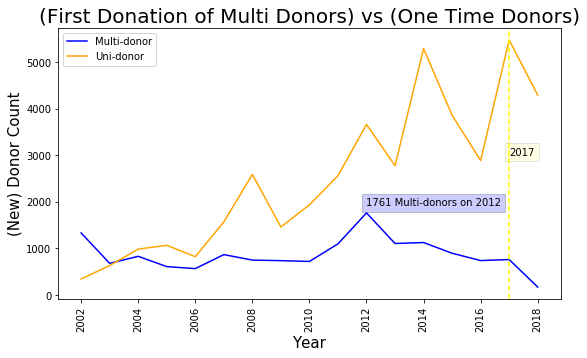

In [17]:
fig = plt.figure(figsize = (9,5))
plt.plot(time_line_data_year['YEAR'], time_line_data_year['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(time_line_data_year['YEAR'], time_line_data_year['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('(First Donation of Multi Donors) vs (One Time Donors)', fontsize = 20)
plt.text(2012,1911,"1761 Multi-donors on 2012",fontsize=10,bbox=dict(facecolor='blue', alpha=0.2))
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,3000,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.legend()
plt.savefig("SQLDATA/PYTHON_OUTPUTS/multi_donor_vs_uni_donor_year.png")
plt.show()

Clearly there is a general trend in the rise of Uni-donors as compared to Multi-donors. LUF got most Multi-donors in the 2012 than in any other year. Why? <br>

2002 is an interesting year for LUF. It is the only year where number of Multi-donors is more than the number of Uni-donors. The main reason for this as you'll see later is because of the credit called 'Sagalassos Research Project'. More than 700 multi-donors signed up to donate to this fund in the year 2002.

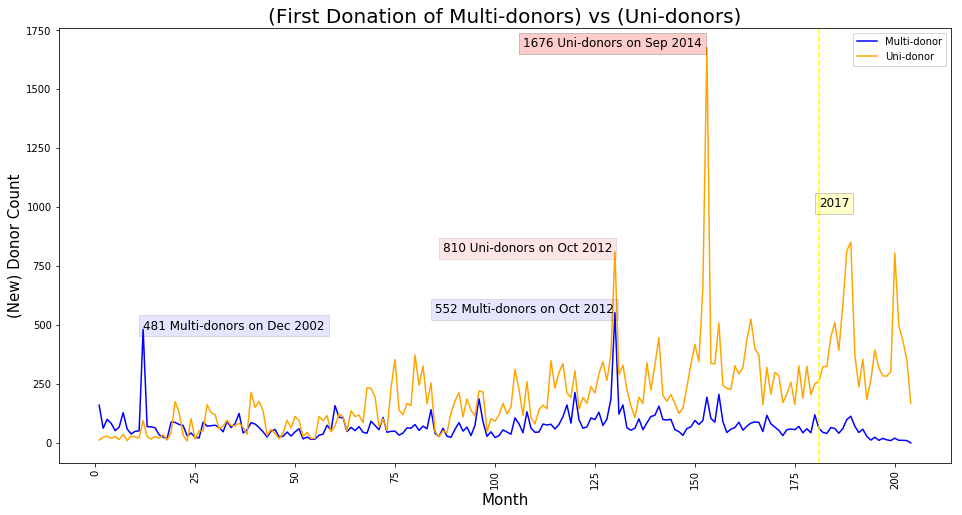

In [18]:
#Plot using Month
fig = plt.figure(figsize = (16,8))
plt.plot(time_line_data_comb['ZLUF_DOCDATE_M_N'], time_line_data_comb['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(time_line_data_comb['ZLUF_DOCDATE_M_N'], time_line_data_comb['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('(First Donation of Multi-donors) vs (Uni-donors)', fontsize = 20)
plt.text(12,481,"481 Multi-donors on Dec 2002",fontsize=12,bbox=dict(facecolor='blue', alpha=0.1))
plt.text(85,552,"552 Multi-donors on Oct 2012",fontsize=12,bbox=dict(facecolor='blue', alpha=0.1))
plt.text(87,810,"810 Uni-donors on Oct 2012",fontsize=12,bbox=dict(facecolor='red', alpha=0.1))
plt.text(107,1680,"1676 Uni-donors on Sep 2014",fontsize=12,bbox=dict(facecolor='red', alpha=0.2))#153
plt.axvline(x=181,color='yellow',linestyle ='--')
plt.text(181,1000,"2017",fontsize=12,bbox=dict(facecolor='yellow', alpha=0.2))
plt.savefig("SQLDATA/PYTHON_OUTPUTS/multi_donor_vs_uni_donor_monthly.png")
plt.show()

You can see there is a clear spike in the number of donations made by Uni-donors in Sep 2014. <br>

What was so special about Sep 2014? <br>
A research on Google showed that from June - September 2014, the <b>Ice Bucket Challenge</b> was trending virally on Social Media. <br>
But what does the Ice Bucket Challenge has to do with the LUF? <br>
It turns out that the main purpose of Ice Bucket Challenge was to spread the awareness of <b><i>ALS (Amyotrophic Lateral Sclerosis)</i></b> disease. This is the same disease that affected Stephen Hawking. <br>
LUF has a couple of funds that is mainly concerned with ALS namely <i>Fonds Een hart voor ALS </i> and <i>Laeversfonds voor ALS onderzoek</i>. In the analysis below, you'll see that many Uni-donors have donated to these two funds on Sep 2014. That's why the huge peak.

In [19]:
key_analysis = main_data[['PARTNER','TYPE','CREDIT_DESCRIPTION','ZLUF_DOCDATE','ZZAMNT_PAYED_NORM','IS_MULTI_DONOR']]
key_analysis['ZLUF_DOCDATE'] = pd.to_datetime(key_analysis['ZLUF_DOCDATE'])
key_analysis['ZLUF_DOCDATE_Y'] = key_analysis['ZLUF_DOCDATE'].dt.year
key_analysis['ZLUF_DOCDATE_M'] = key_analysis['ZLUF_DOCDATE'].dt.month
key_analysis['ZLUF_DOCDATE_M_N'] = (key_analysis['ZLUF_DOCDATE_Y'] - 
                                          key_analysis['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + key_analysis['ZLUF_DOCDATE_M']

#Top 5 funds donated by Uni-donors on Sep 2014
sep_2014_ka_ud = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==0)]
sep_2014_ka_ud.reset_index(drop=True,inplace=True)
print(sep_2014_ka_ud.shape)
sep_2014_ka_ud['CREDIT_DESCRIPTION'].value_counts()[:5]

(1676, 9)


Fonds Een hart voor ALS           1030
Bone4Kids Fonds                    120
Laeversfonds voor ALSonderzoek      83
Université Bujumbura                74
Kinderkankerfonds Leuven            72
Name: CREDIT_DESCRIPTION, dtype: int64

<i>Fonds Een hart voor ALS</i> received 1030 donations on the month of Sep 2014 from Uni-donors. This confirms the theory that the spike was due to Ice Bucket Challenge.

In [20]:
#Top 5 funds donated by Multi-donors on Sep 2014
sep_2014_ka_md = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==1)]
sep_2014_ka_md.reset_index(drop=True,inplace=True)
print(sep_2014_ka_md.shape)
sep_2014_ka_md['CREDIT_DESCRIPTION'].value_counts()[:5]

(194, 9)


Fonds Een hart voor ALS               53
Bone4Kids Fonds                       42
KID-Fonds                             38
Rondoufonds voor Duchenneonderzoek    10
Université Bujumbura                   8
Name: CREDIT_DESCRIPTION, dtype: int64

Fonds Een hart voor ALS received 53 donations on the month of Sep 2014 from Multi-donors.<br> 
So only about 5% (53/(53+1030)) of the donors who first donated to Fonds Een hart voor ALS in the month of Sep 2014 went on to become Multi-donors.

In [21]:
#For Uni donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==0)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
ud_sep2014_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
ud_sep2014_aggregate['CREDIT_DESCRIPTION'] = ud_sep2014_aggregate.index
ud_sep2014_aggregate = ud_sep2014_aggregate.reset_index(drop=True)
ud_sep2014_aggregate = ud_sep2014_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = ud_sep2014_aggregate['CREDIT_DESCRIPTION']
ud_sep2014_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
ud_sep2014_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
ud_sep2014_aggregate['CREDIT_COUNT'] = ud_sep2014_aggregate['CREDIT_COUNT'].astype(int)
ud_sep2014_aggregate['CREDIT_SUM'] = ud_sep2014_aggregate['CREDIT_MEAN'] * ud_sep2014_aggregate['CREDIT_COUNT']
ud_sep2014_aggregate = ud_sep2014_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
ud_sep2014_aggregate = ud_sep2014_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
ud_sep2014_aggregate['CREDIT_MEAN'] = ud_sep2014_aggregate['CREDIT_MEAN'].round(2)
ud_sep2014_aggregate['CREDIT_STD'] = ud_sep2014_aggregate['CREDIT_STD'].round(2)
ud_sep2014_aggregate.reset_index(drop=True,inplace=True)
print(ud_sep2014_aggregate.shape)
ud_sep2014_aggregate.head()

(34, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Fonds Een hart voor ALS,1030,29.97,70.94,1.0,20.0,2000.0,30869.96
1,Bone4Kids Fonds,120,253.65,1371.39,5.0,27.5,10300.0,30437.80
2,Laeversfonds voor ALSonderzoek,83,22.11,23.33,2.5,15.0,100.0,1835.00
3,Université Bujumbura,74,46.05,64.58,7.5,30.0,500.0,3407.50
4,Kinderkankerfonds Leuven,72,78.54,106.63,15.0,45.0,500.0,5655.00


In [22]:
#For Multi donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==1)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
md_sep2014_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
md_sep2014_aggregate['CREDIT_DESCRIPTION'] = md_sep2014_aggregate.index
md_sep2014_aggregate = md_sep2014_aggregate.reset_index(drop=True)
md_sep2014_aggregate = md_sep2014_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = md_sep2014_aggregate['CREDIT_DESCRIPTION']
md_sep2014_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
md_sep2014_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
md_sep2014_aggregate['CREDIT_COUNT'] = md_sep2014_aggregate['CREDIT_COUNT'].astype(int)
md_sep2014_aggregate['CREDIT_SUM'] = md_sep2014_aggregate['CREDIT_MEAN'] * md_sep2014_aggregate['CREDIT_COUNT']
md_sep2014_aggregate = md_sep2014_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
md_sep2014_aggregate = md_sep2014_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
md_sep2014_aggregate['CREDIT_MEAN'] = md_sep2014_aggregate['CREDIT_MEAN'].round(2)
md_sep2014_aggregate['CREDIT_STD'] = md_sep2014_aggregate['CREDIT_STD'].round(2)
md_sep2014_aggregate.reset_index(drop=True,inplace=True)
print(md_sep2014_aggregate.shape)
md_sep2014_aggregate.head()

(25, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Fonds Een hart voor ALS,53,47.85,38.56,5.0,31.5,187.0,2536.0
1,Bone4Kids Fonds,42,330.12,1659.81,5.0,32.5,10800.0,13865.0
2,KID-Fonds,38,52.68,88.88,10.0,25.0,427.0,2002.0
3,Rondoufonds voor Duchenneonderzoek,10,545.00,1565.61,10.0,50.0,5000.0,5450.0
4,Kinderkankerfonds Leuven,8,148.12,188.36,15.0,60.0,450.0,1185.0
